# Dynamic Programming

In [2]:
import numpy as np
from pprint import pprint
from frozenlake import FrozenLakeEnv
from plot_utils import plot_values


In [3]:
env = FrozenLakeEnv()

In [4]:
print(env.desc)

[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]


In [5]:
print(env.observation_space)
print(env.action_space)

print(env.nS)
print(env.nA)

Discrete(16)
Discrete(4)
16
4


In [6]:
state = 1
action = 0
possible = env.P[state][action]

In [7]:
pprint(possible)

[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]


In [8]:
state = 1
action = 1
possible = env.P[state][action]

In [9]:
pprint(possible)

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True),
 (0.3333333333333333, 2, 0.0, False)]


### Problem 1: Iterative Policy Evaluation
* Policy $\pi$ 가 주어져 있을 때, 그 policy에 대응하는 Value function를 계산하자.

In [10]:
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    delta = theta
    while not (delta < theta):
        delta = 0
        for s in range(env.nS):
            v = V[s]
            val = 0
            for a in range(env.nA):
                for possible in env.P[s][a]:
                    val += policy[s,a] * possible[0] * (possible[2]+gamma*V[possible[1]])
            
            V[s] = val
            delta = max(delta, abs(v-V[s]))
    return V

In [11]:
random_policy = np.ones([env.nS, env.nA]) / env.nA

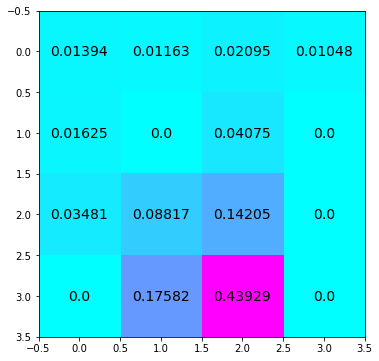

In [12]:
# evaluate the policy 
V = policy_evaluation(env, random_policy)

plot_values(V)

### Problem 2: Obtain $q_\pi$ from $v_\pi$
* Value function $V$ 가 계산되었다면, 그것으로 부터 Action-State Value Function $q$ 를 구해보자.

In [13]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    for a in range(env.nA):
        for possible in env.P[s][a]:
            q[a] += possible[0] * (possible[2] + gamma * V[possible[1]] )
    return q

In [14]:
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print(Q)

[[0.0147094  0.01393978 0.01393978 0.01317015]
 [0.00852356 0.01163091 0.0108613  0.01550788]
 [0.02444514 0.02095298 0.02406033 0.01435346]
 [0.01047649 0.01047649 0.00698432 0.01396865]
 [0.02166487 0.01701828 0.01624865 0.01006281]
 [0.         0.         0.         0.        ]
 [0.05433538 0.04735105 0.05433538 0.00698432]
 [0.         0.         0.         0.        ]
 [0.01701828 0.04099204 0.03480619 0.04640826]
 [0.07020885 0.11755991 0.10595784 0.05895312]
 [0.18940421 0.17582037 0.16001424 0.04297382]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08799677 0.20503718 0.23442716 0.17582037]
 [0.25238823 0.53837051 0.52711478 0.43929118]
 [0.         0.         0.         0.        ]]


### Problem 3: Policy Improvement
* policy $\pi$ 를 한 단계 향상시키는 방향으로 만들어주는 함수를 만들어 보자.

문제 발견,, Q[s]를 사용하면 에러가 나고 q 를 사용하면 에러가 안나 왜일까..

In [15]:
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):
        q = q_from_v(env, V, s, gamma)
        policy[s] = np.where(q<np.max(q),0,1)
        policy[s] /= np.sum(policy[s])
    return policy

In [16]:
policy_improvement(env, V, gamma=1)

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.  , 0.5 , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

### Problem 4: Policy Iteration

In [17]:
def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    policy_stable = False
    while not policy_stable:
        V = policy_evaluation(env,policy)
        new_policy = policy_improvement(env,V)

        if (policy==new_policy).all():
            policy_stable = True

        policy = new_policy
    return policy, V

[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



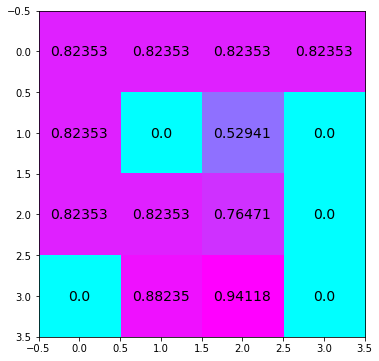

In [18]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)
print(policy_pi,"\n")

plot_values(V_pi)

### Problem 5: Value Iteration

In [21]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    delta = theta
    while not (delta < theta):
        delta = 0
        for s in range(env.nS):
            v = V[s]
            val = np.zeros(env.nA)
            for a in range(env.nA):
                for possible in env.P[s][a]:
                    val[a] += possible[0] * (possible[2]+gamma*V[possible[1]])
            
            V[s] = np.max(val)
            delta = max(delta, abs(v-V[s]))
    
    policy = policy_improvement(env, V, gamma)
    return policy, V

[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



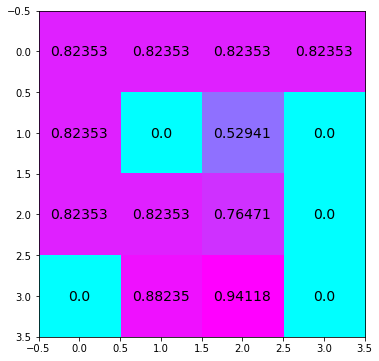

In [22]:
policy_vi, V_vi = value_iteration(env)
print(policy_vi,"\n")

plot_values(V_vi)

## Optional HW

### 1. 좀 더 큰사이즈로 늘려보세요

In [23]:
import numpy as np
from pprint import pprint
from frozenlake import FrozenLakeEnv
from plot_utils import plot_values

In [25]:
env = FrozenLakeEnv(map_name = '8x8')
print(env.desc)
print(env.observation_space)
print(env.action_space)
print(env.nS)
print(env.nA)

[[b'S' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'H' b'H' b'F' b'F' b'F' b'H' b'F']
 [b'F' b'H' b'F' b'F' b'H' b'F' b'H' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'G']]
Discrete(64)
Discrete(4)
64
4


In [27]:
import numpy as np
import matplotlib.pyplot as plt
def plot_values_up(V):
	# reshape value function
	V_sq = np.reshape(V, (8,8))

	# plot the state-value function
	fig = plt.figure(figsize=(10, 10))
	ax = fig.add_subplot(111)
	im = ax.imshow(V_sq, cmap='cool')
	for (j,i),label in np.ndenumerate(V_sq):
	    ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)

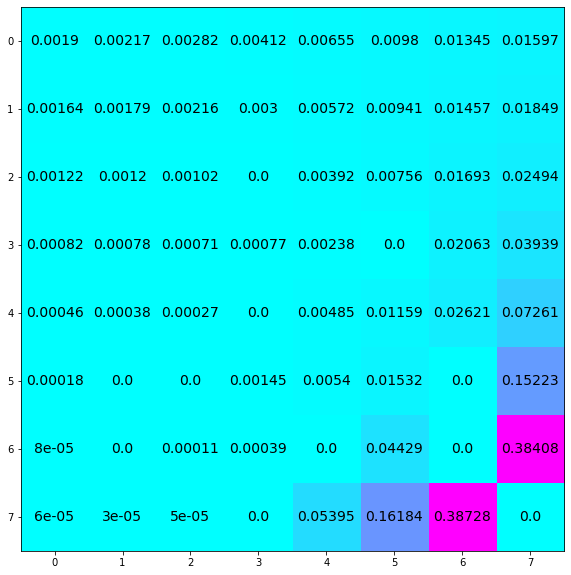

In [28]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
V = policy_evaluation(env, random_policy)

plot_values_up(V)

In [29]:
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print(Q)

[[1.81486163e-03 1.90359130e-03 1.90359130e-03 1.99230863e-03]
 [1.95464817e-03 2.16977577e-03 2.25850544e-03 2.29616590e-03]
 [2.38002089e-03 2.81515727e-03 3.03028487e-03 3.03515956e-03]
 [3.31149818e-03 4.12056553e-03 4.55570191e-03 4.49449090e-03]
 [5.46258595e-03 6.54776771e-03 7.35683506e-03 6.82387639e-03]
 [8.58845508e-03 9.80331338e-03 1.08884951e-02 9.93298380e-03]
 [1.26071171e-02 1.34478887e-02 1.46627470e-02 1.30737954e-02]
 [1.59702036e-02 1.59702036e-02 1.68109751e-02 1.51294253e-02]
 [1.58637745e-03 1.54871699e-03 1.63743431e-03 1.77720117e-03]
 [1.66908576e-03 1.66421107e-03 1.84165807e-03 1.98744629e-03]
 [1.87393311e-03 1.93514412e-03 2.27666186e-03 2.53484406e-03]
 [2.09190128e-03 2.62485995e-03 3.27999863e-03 3.99837993e-03]
 [4.48781828e-03 5.44332963e-03 6.62632235e-03 6.32028060e-03]
 [7.69567681e-03 9.28462836e-03 1.06459188e-02 1.00309684e-02]
 [1.32627086e-02 1.49442584e-02 1.62887871e-02 1.37849033e-02]
 [1.84925351e-02 1.93333134e-02 1.97999917e-02 1.634429

In [30]:
policy_improvement(env, V, gamma=1)

array([[0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.5 , 0.  , 0.5 ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.

[[0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.5  0.   0.5 ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.5 

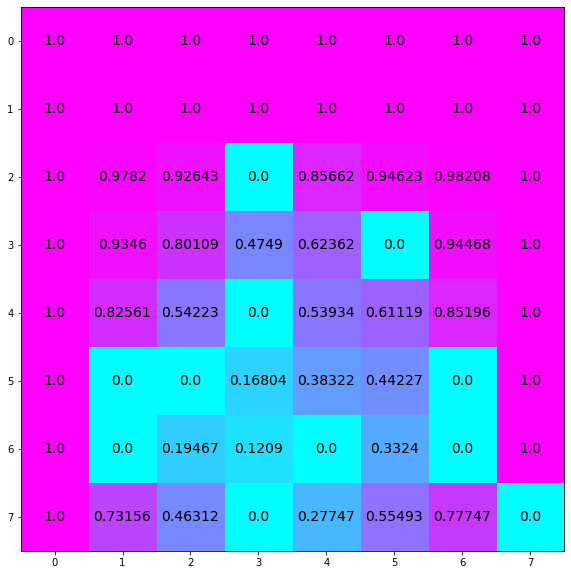

In [31]:
policy_pi, V_pi = policy_iteration(env)
print(policy_pi,"\n")

plot_values_up(V_pi)

[[0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.5  0.   0.5 ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.5 

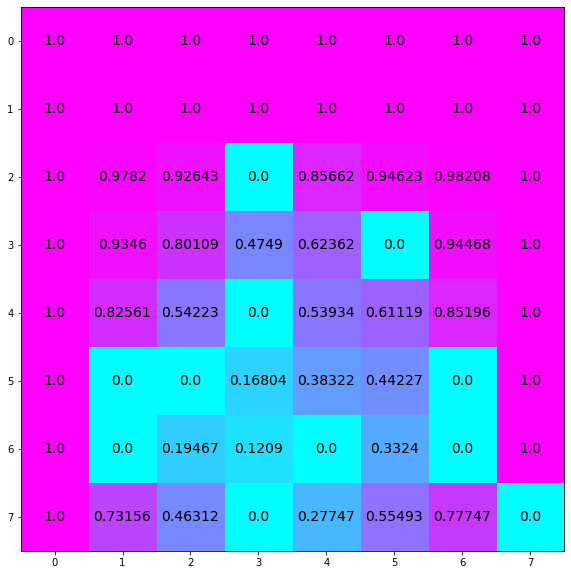

In [32]:
policy_vi, V_vi = value_iteration(env)
print(policy_vi,"\n")

plot_values_up(V_vi)

### 2. Deterministic으로 바꿔보세요

### 3. 둘 다 적용해볼까요